In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import alexnet

from lib.datasets import datasets
from lib.utils import train, alex_classifier, pac_label_to_string, save_model, load_model, list_models, compute_error_rate

cuda = torch.cuda.is_available()

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# PACS

In [2]:
ds = datasets()
ds.create_dataset('pacs', pacs='art_painting', pacs_heuristic=True)
batch_loader = ds.batch_loader(256)

Training the model!
Params to learn:
	 classifier.1.weight
	 classifier.1.bias
	 classifier.4.weight
	 classifier.4.bias
	 classifier.6.weight
	 classifier.6.bias
You can interrupt it at any time.
----------------------------------------------------------
After epoch  1 | valid err rate: 66.70% | doing  50 epochs
----------------------------------------------------------
----------------------------------------------------------
After epoch  2 | valid err rate: 32.91% | doing  50 epochs
----------------------------------------------------------
----------------------------------------------------------
After epoch  3 | valid err rate: 19.78% | doing  50 epochs
----------------------------------------------------------
----------------------------------------------------------
After epoch  4 | valid err rate: 13.38% | doing  50 epochs
----------------------------------------------------------
----------------------------------------------------------
After epoch  5 | valid err rate:  9.

----------------------------------------------------------
After epoch 46 | valid err rate:  2.25% | doing  50 epochs
----------------------------------------------------------
----------------------------------------------------------
After epoch 47 | valid err rate:  2.10% | doing  50 epochs
----------------------------------------------------------
----------------------------------------------------------
After epoch 48 | valid err rate:  2.05% | doing  50 epochs
----------------------------------------------------------
----------------------------------------------------------
After epoch 49 | valid err rate:  2.29% | doing  50 epochs
----------------------------------------------------------
Minibatch    400  | loss  0.29 | err rate  8.00%
----------------------------------------------------------
After epoch 50 | valid err rate:  2.44% | doing  50 epochs
----------------------------------------------------------


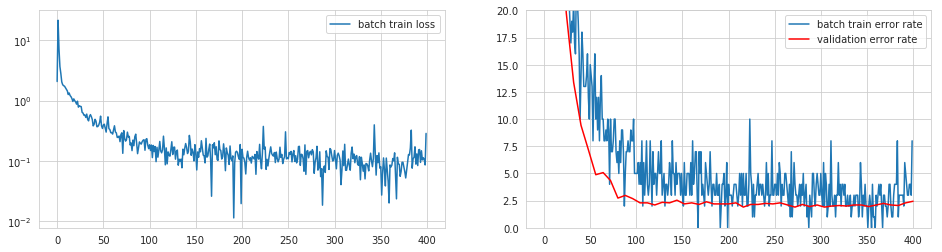

In [3]:
net = alexnet(pretrained=True)

# pick what to train

for param in net.parameters():
    param.requires_grad = False
    
net.classifier = alex_classifier(8)

criterion = nn.NLLLoss()
optimizer = optim.Adam(net.classifier.parameters(), lr=0.001)

train(net, batch_loader, optimizer, criterion, num_epochs = 50, cuda = cuda)

In [ ]:
ds.create_dataset('pacs', pacs='cartoon', pacs_heuristic=True)
batch_loader = ds.batch_loader(256)

train(net, batch_loader, optimizer, criterion, num_epochs = 50, cuda = cuda)

In [ ]:
ds.create_dataset('pacs', pacs='photo', pacs_heuristic=True)
batch_loader = ds.batch_loader(256)

train(net, batch_loader, optimizer, criterion, num_epochs = 50, cuda = cuda)

In [ ]:
ds.create_dataset('pacs', pacs='sketch', pacs_heuristic=True)
batch_loader = ds.batch_loader(256)

train(net, batch_loader, optimizer, criterion, num_epochs = 50, cuda = cuda)

# TESTING PACS

In [ ]:

e_sum = 0
for name in ['art_painting', 'cartoon', 'photo', 'sketch']:
    ds.create_dataset('pacs', pacs=name)
    batch_loader = ds.batch_loader(256)
    res = compute_error_rate(net, batch_loader, cuda)
    print('PACS ', name, ' domain error rate: ', res)
    e_sum += res

print('avr error for all: ', e_sum / 4.0)

In [20]:
#print('prediction : ' , pac_label_to_string(net.forward(ds.item(num, 'train')[0][None,:].cuda()).max(dim=1)[1][0]))
save_model(net, 'pacs')

prediction :  elephant
